In [2]:
# import required libraries
import pandas as pd
import numpy as np

# adjust the default display options for columns and rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 10)

# main plotting library to be used
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# for better plot visuals
import seaborn as sns 

In [3]:
df = pd.read_csv("../data/coaster_db.csv")

df.head(2)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.574,-73.978,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0


## Step 1: Understand the Data

* Check the `shape` of the data
* Peek at sample data with `df.head()` or `df.describe()` to get stats about the numeric columns
* Get a list of columns with `df.columns`
* Check data types of columns with `df.dtypes`

In [4]:
df.shape

(1087, 56)

In [5]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
df.dtypes

coaster_name         object
Length               object
Speed                object
Location             object
Status               object
                     ...   
height_value        float64
height_unit          object
height_ft           float64
Inversions_clean      int64
Gforce_clean        float64
Length: 56, dtype: object

In [7]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## Step 2: Prepare the Data

- Subset the dataframe by dropping irrelevant columns and rows
- Rename columns
- Identify duplicated columns
- Create feature

### Dropping Columns

- Two options:
    - using `df.drop()` method - i.e., `df.drop(['col1','col2',...,'coln'], axis=1)`
    - or ->

In [8]:
# copy the column values from df.columns and comment out the columns that should be dropped
# rewrite the existing dataframe
# ensure to use `copy()` method so the interpereter knows that we are making no references to
# the prior version of the df object

df = df[['coaster_name', 
    # 'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
    #'Type',
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
    # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    # 'Track layout', 'Fastrack available', 'Soft opening date.1',
    # 'Closing date', 'Opened', 'Replaced by', 'Website',
    # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    # 'Single rider line available', 'Restraint Style',
    # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
    'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
    'speed_mph', 
    # 'height_value', 'height_unit', 
    'height_ft',
    'Inversions_clean', 'Gforce_clean']].copy()

# check the shape to confirm the column count
df.shape

(1087, 13)

### Checking for data type inconsistencies

In [9]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
                       ...   
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
Length: 13, dtype: object

In [10]:
# opening_date_clean should be type of date not string/object

df['opening_date_clean']

0       1884-06-16
1       1895-01-01
2              NaN
3       1901-01-01
4       1901-01-01
           ...    
1082           NaN
1083    2022-01-01
1084    2016-06-16
1085           NaN
1086    2022-01-01
Name: opening_date_clean, Length: 1087, dtype: object

In [11]:
pd.to_datetime(df['opening_date_clean'])

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

In [12]:
# convert the opening_date_clean data type to date type
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

### Renaming Columns
- Assume that the required naming convention is a mix of oftitlecase/snakecase based on the length of the column
- and clean or Clean need to removed from the column name
- For example:
    - opening_date_clean => Opening_Date
    - Gforce_Clean => Gforce

In [13]:
# test out the logic to be used
col = 'opening_date_clean'
col = [x for x in col.split('_') if x not in ['clean', 'Clean']]
col = "_".join(x.title() for x in col)
col 

'Opening_Date'

In [14]:
# create the custom column naming function

def rename_column(col):
    col = [x for x in col.split('_') if x not in ['clean', 'Clean']]
    col = '_'.join(x.title() for x in col)
    return col 

In [15]:
# apply the function to the df columns
df.rename(rename_column, axis=1)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [16]:
# Alternative method
df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_Mph',
                   'height_ft':'Height_Ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [17]:
# make the column name changes permanent

df = df.rename(rename_column, axis=1)

### Identifying the missing values

In [18]:
# check the sum of number of rwos with null values in each column

df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
                  ... 
Opening_Date       250
Speed_Mph          150
Height_Ft          916
Inversions           0
Gforce             725
Length: 13, dtype: int64

### Identifying the duplicate rows - if any

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [20]:
# get the count of duplicated rows
df.duplicated().sum()

0

In [21]:
# access the duplicated rows - as if there were any
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce


In [22]:
# further check for duplicated rows in the main subsets - i.e peek at Coaster_Name
df.duplicated(subset=['Coaster_Name'])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [23]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [24]:
# get a quick count of duplicated row values
df.loc[df.duplicated(subset='Coaster_Name')].count()

Coaster_Name       97
Location           97
Status             30
Manufacturer       96
Year_Introduced    97
                   ..
Opening_Date       30
Speed_Mph          87
Height_Ft          12
Inversions         97
Gforce             38
Length: 13, dtype: int64

In [25]:
# to get a beter idea about why there are 97 duplicated coaster names,
# select one and explore
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [26]:
# notice that 'Year_Introduced' is the only colum that is different.
# decide on a subset of columns that should be deduplicated 
# in this case Name, Location, and OpeningDate columns to be deduplicated make sense
df.duplicated(['Coaster_Name', 'Location', 'Opening_Date']).sum()

97

In [27]:
df.duplicated(subset= ['Coaster_Name', 'Location', 'Opening_Date'])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [28]:
# need to utilize the inverse `~` logic to remove these 97 rows
~df.duplicated(subset= ['Coaster_Name', 'Location', 'Opening_Date'])

0        True
1        True
2        True
3        True
4        True
        ...  
1082    False
1083     True
1084    False
1085     True
1086     True
Length: 1087, dtype: bool

In [29]:
# locate where the values are not duplicates in the subset of columns
df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [30]:
# since removing these rows permanently will change the index order 
# RESET the index.

df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])]\
    .reset_index()

,index,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
0,0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1079,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [31]:
# notice that reset_index() method by default generates an additional column named 'index'
# to remove this extra index column, ensure to pass `drop=True` optional argument to the method call

df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])] \
    .reset_index(drop=True)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [32]:
# rewrite the df using copy() method
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])] \
    .reset_index(drop=True).copy()

In [33]:
# check the sahpe of the new df

df.shape

(990, 13)

### Step 3: Data Visualization
- Run Univariate Analysis on the data
- Plot Histogram

In [34]:
# check the value count for coasters based on Year_Introduced

df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

### Task: Plot the top 10 Years Coasters were introduced.

<AxesSubplot:title={'center':'Top 10 Years Rollercoasters Introduced'}>

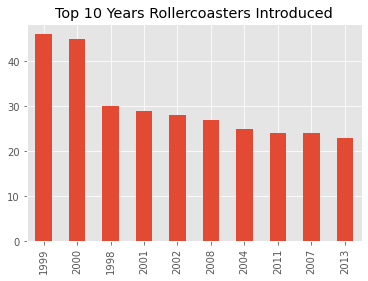

In [35]:
df['Year_Introduced'].value_counts().head(10) \
    .plot(kind='bar', title='Top 10 Years Rollercoasters Introduced')

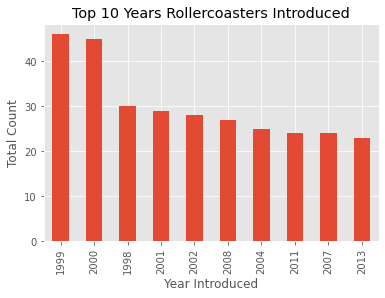

In [36]:
# add labels
ax = df['Year_Introduced'].value_counts().head(10) \
    .plot(kind='bar', title='Top 10 Years Rollercoasters Introduced')

ax.set_xlabel('Year Introduced')
ax.set_ylabel('Total Count')

# without the show() method will print the plt object in the console
plt.show()

### Task: Plot the distribution of Coaster Speed

<AxesSubplot:ylabel='Frequency'>

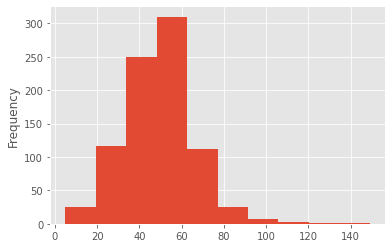

In [37]:
df['Speed_Mph'].plot(kind='hist')

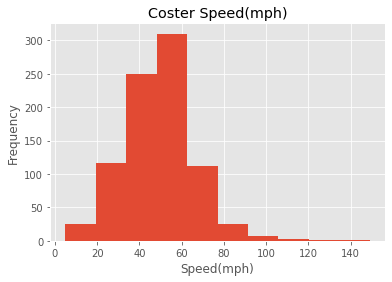

In [38]:
ax = df['Speed_Mph'].plot(kind='hist', title='Coster Speed(mph)')

ax.set_xlabel('Speed(mph)')

plt.show()

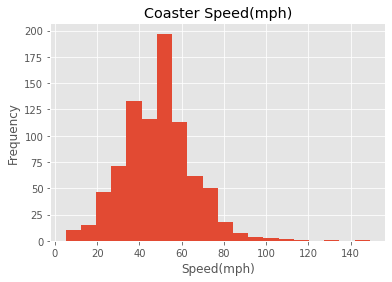

In [39]:
# adjust the bins to get a better visual for the distribution of the data

ax = df['Speed_Mph'].plot(
                        kind='hist',
                        title='Coaster Speed(mph)',
                        bins=20
                        )

ax.set_xlabel('Speed(mph)')

plt.show()



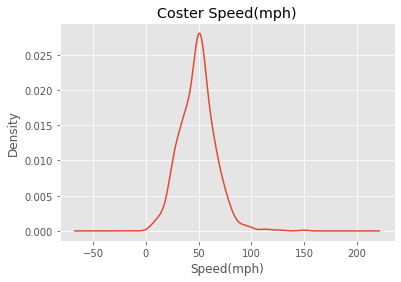

In [40]:
# using kde

ax = df['Speed_Mph'].plot(kind='kde', title='Coster Speed(mph)')

ax.set_xlabel('Speed(mph)')

plt.show()

### Task: Plot the Material Type using Pie Plot

In [41]:
df['Type_Main'].value_counts()

Steel    728
Wood     191
Other     71
Name: Type_Main, dtype: int64

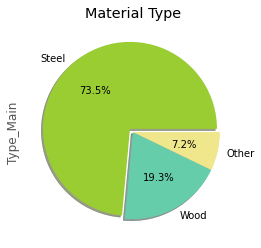

In [42]:
# 
ax = df['Type_Main'].value_counts() \
    .plot(kind='pie',
        title='Material Type',
        explode = [0.05, 0, 0],
        colors =['yellowgreen', 'mediumaquamarine', 'khaki' ],
        autopct='%0.1f%%',
        shadow = True)

plt.show()

## Step 4: Feature Relationships
- Scatterplot
- Groupby 

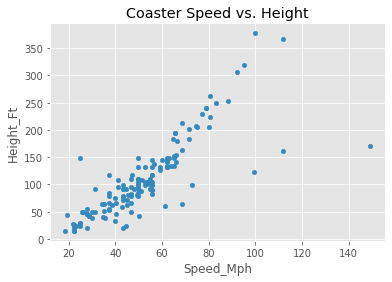

In [43]:
# compare the relationship between coaster speed and coaster height
df.plot(kind='scatter',
       x='Speed_Mph',
       y='Height_Ft',
       title='Coaster Speed vs. Height')

plt.show()

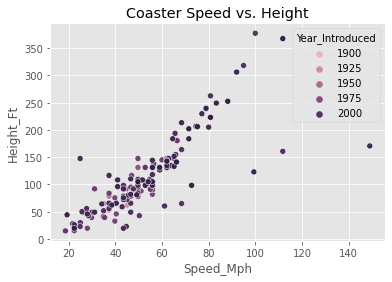

In [44]:
# displaying the plot using seaborn 
ax = sns.scatterplot(x='Speed_Mph',
                y='Height_Ft',
                hue='Year_Introduced',
                data=df)
ax.set_title('Coaster Speed vs. Height')
plt.show()

### Task: Compare more than two features using seaborn's `pairplot`. 

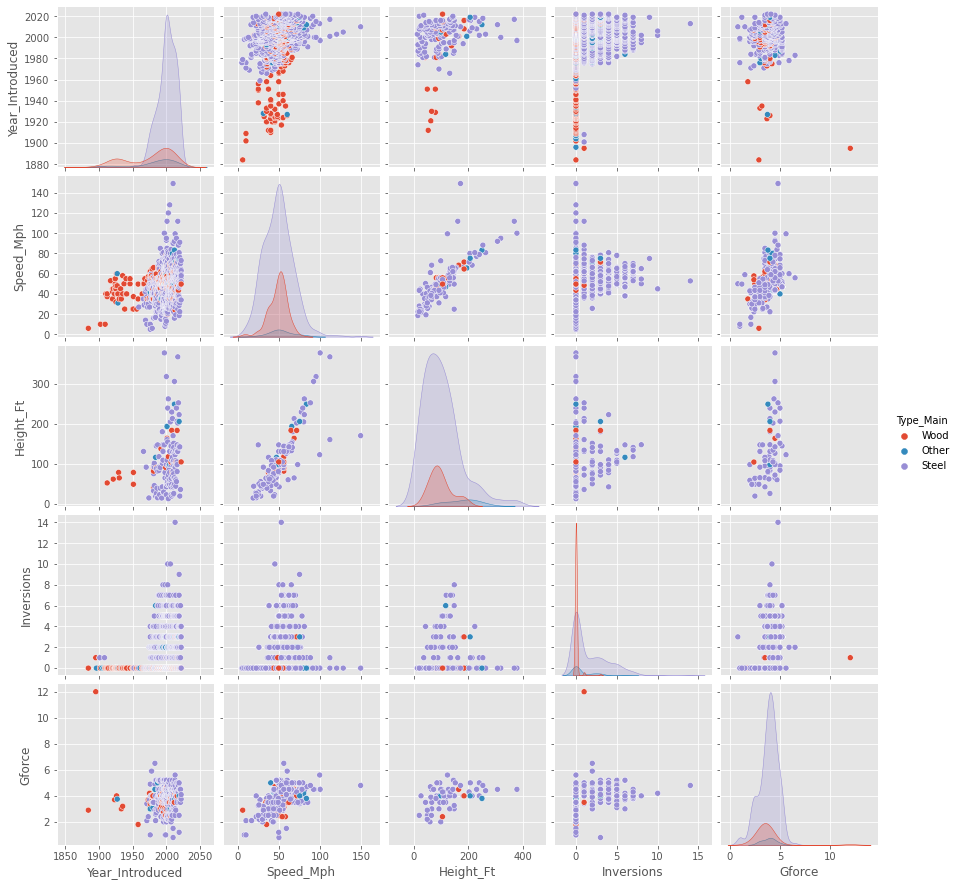

In [45]:
sns.pairplot(df,
             vars=['Year_Introduced','Speed_Mph',
                   'Height_Ft','Inversions','Gforce'],
            hue='Type_Main')
plt.show()

### Task: Analyze the correlation among the subset of features that are numeric.

In [46]:
df[['Year_Introduced','Speed_Mph',
    'Height_Ft','Inversions','Gforce']].corr()

,Year_Introduced,Speed_Mph,Height_Ft,Inversions,Gforce
Year_Introduced,1.000000,0.225991,0.249487,0.233701,-0.073403
Speed_Mph,0.225991,1.000000,0.823216,0.246593,0.503828
Height_Ft,0.249487,0.823216,1.000000,0.138286,0.480465
Inversions,0.233701,0.246593,0.138286,1.000000,0.339137
Gforce,-0.073403,0.503828,0.480465,0.339137,1.000000


In [47]:
# drop the null values for more accurate insight 
# assign to a variable to use with sns.heatmap

df_corr = df[['Year_Introduced','Speed_Mph',
    'Height_Ft','Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_Mph,Height_Ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_Mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_Ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<AxesSubplot:>

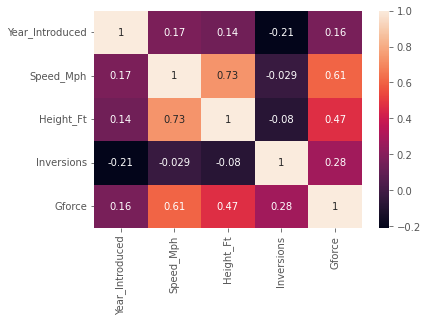

In [48]:
sns.heatmap(df_corr, annot=True)

## Step 5: Answer Questions about the data
- Provide a list of locations with
    - the fastest roller coasters
    - and minimum 10 coasters in operation

In [49]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [50]:
df['Location'].value_counts()

Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: Location, Length: 280, dtype: int64

In [51]:
# need to ignore the 'Other' location
df.query('Location != "Other"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
5,Cannon Coaster,Coney Island,Removed,George Francis Meyer,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,0,NaN
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


## Step 5: Answer Questions about the data
- Provide a list of locations with
    - the fastest roller coasters
    - and minimum 10 coasters in operation

In [52]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [53]:
df['Location'].value_counts()

Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: Location, Length: 280, dtype: int64

In [54]:
# There are 181 locations that fall in the category of 'Other'. 
# Ignore these locations

df.query('Location != "Other"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
5,Cannon Coaster,Coney Island,Removed,George Francis Meyer,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,0,NaN
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [56]:
# group the data by location excluding 'Other'
df.query('Location != "Other"').groupby('Location')

In [57]:
# check the 'Speed_Mph' count for each location
df.query('Location != "Other"') \
    .groupby('Location')['Speed_Mph']

In [58]:
# find the average speed and the number of coasters in that particular location
df.query('Location != "Other"') \
    .groupby('Location')['Speed_Mph'] \
        .agg(['mean', 'count'])

,mean,count
Location,,
"2904 Fantasy Way Myrtle Beach, South Carolina, U.S.",NaN,0
"63rd and N.W. Expressway, Oklahoma City, Oklahoma, U.S.",NaN,0
"8039 Beach BoulevardBuena Park, California 90620, U.S.",NaN,0
Adlabs Imagica,42.50,1
Adventure City,31.10,1
...,...,...
Xishuangbanna Theme Park,52.80,1
Yomiuriland,51.45,4
ZDT's Amusement Park,40.40,1


In [59]:
# query the locations where the count >= 10
df.query('Location != "Other"') \
    .groupby('Location')['Speed_Mph'] \
    .agg(['mean', 'count']) \
    .query('count >= 10')

,mean,count
Location,,
Alton Towers,42.791667,12
Busch Gardens Williamsburg,58.318182,11
Canada's Wonderland,53.533333,12
Carowinds,43.571429,14
Cedar Point,57.833333,18
Hersheypark,50.576923,13
Kings Dominion,52.083333,12
Kings Island,49.273684,19
Six Flags Great Adventure,53.036364,11


In [60]:
# sort the output by avg Speed_Mph
df.query('Location != "Other"') \
    .groupby('Location')['Speed_Mph']   \
    .agg(['mean', 'count']) \
    .query('count >= 10')   \
    .sort_values('mean', ascending=False)

,mean,count
Location,,
Busch Gardens Williamsburg,58.318182,11
Cedar Point,57.833333,18
Six Flags Magic Mountain,57.241176,17
Canada's Wonderland,53.533333,12
Six Flags Great Adventure,53.036364,11
Kings Dominion,52.083333,12
Hersheypark,50.576923,13
Kings Island,49.273684,19
Carowinds,43.571429,14


In [61]:
df.query('Location != "Other"') \
    .groupby('Location')['Speed_Mph']   \
    .agg(['mean', 'count']) \
    .query('count >= 10')   \
    .sort_values('mean', ascending=False)['mean']

Location
Busch Gardens Williamsburg    58.318182
Cedar Point                   57.833333
Six Flags Magic Mountain      57.241176
Canada's Wonderland           53.533333
Six Flags Great Adventure     53.036364
Kings Dominion                52.083333
Hersheypark                   50.576923
Kings Island                  49.273684
Carowinds                     43.571429
Alton Towers                  42.791667
Name: mean, dtype: float64

<AxesSubplot:title={'center':'Average Coaster Speed By Location'}, ylabel='Location'>

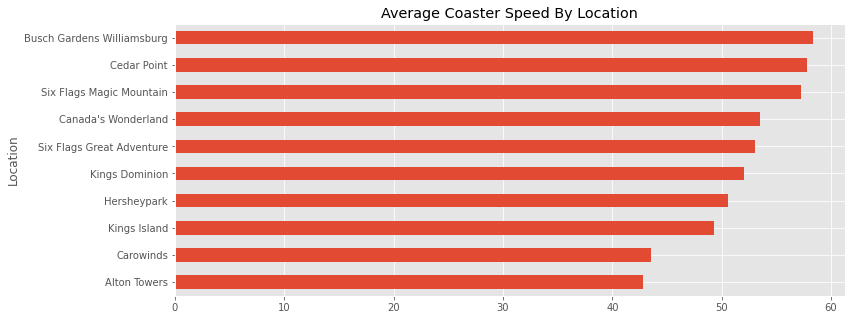

In [62]:
df.query('Location != "Other"') \
    .groupby('Location')['Speed_Mph']   \
    .agg(['mean', 'count']) \
    .query('count >= 10')   \
    .sort_values('mean')['mean']    \
    .plot(kind='barh', figsize=(12,5), title='Average Coaster Speed By Location')

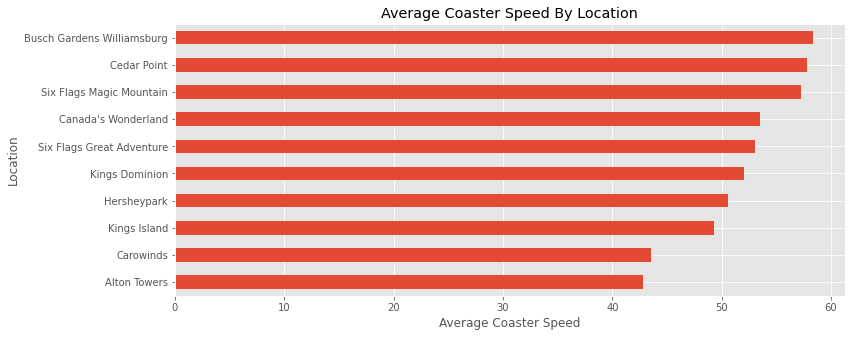

In [63]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_Mph']   \
    .agg(['mean', 'count']) \
    .query('count >= 10')   \
    .sort_values('mean')['mean']    \
    .plot(kind='barh', figsize=(12,5), title='Average Coaster Speed By Location')

ax.set_xlabel('Average Coaster Speed')

plt.show()